# EDA

Exploring the dataset before creating recommendation system models.

In [16]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [17]:
# Importing the custom functions
import sys
import os 

sys.path.append(os.path.abspath('../src'))

from utils import *

## Loading the data

In [18]:
# Loading the four csv files into dataframes for EDA
ratings_df = pd.read_csv('../data/ratings.csv')
movies_df = pd.read_csv('../data/movies.csv')
tags_df = pd.read_csv('../data/tags.csv')
links_df = pd.read_csv('../data/links.csv')

In [19]:
# Set max display options so that I can see everything I need to see
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

## Raw data examination

The dataset comes in four separate CSV files. They will most likely need to be combined for modelling purposes but for now I'll take a look at each separately.

#### ratings.csv

The ratings table alone is enough for creating a collaborative filtering recommendation system model.

In [20]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [21]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
numerical_dqr(ratings_df)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
userId,int64,100836,610,0,0.0,3.261000e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,int64,100836,9724,0,0.0,1.943530e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,float64,100836,10,0,0.0,3.500000e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,int64,100836,85043,0,0.0,1.205946e+09,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


This MovieLens 100k dataset contains ratings from only 610 users across 9742 movies.

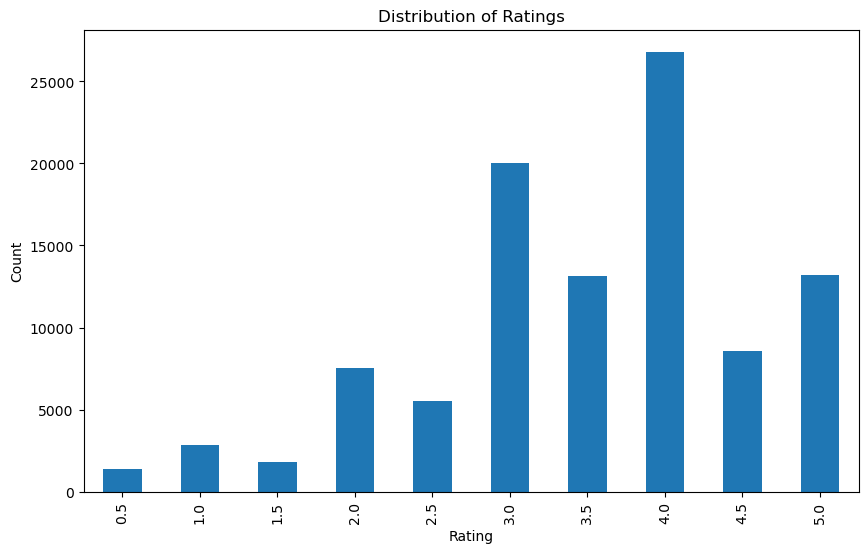

In [40]:
# Distribution of ratings
ratings_distribution = ratings_df['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

4.0 is the most common rating with 3.0 trailing not far behind. .5 ratings seem to be less common than whole number ratings.

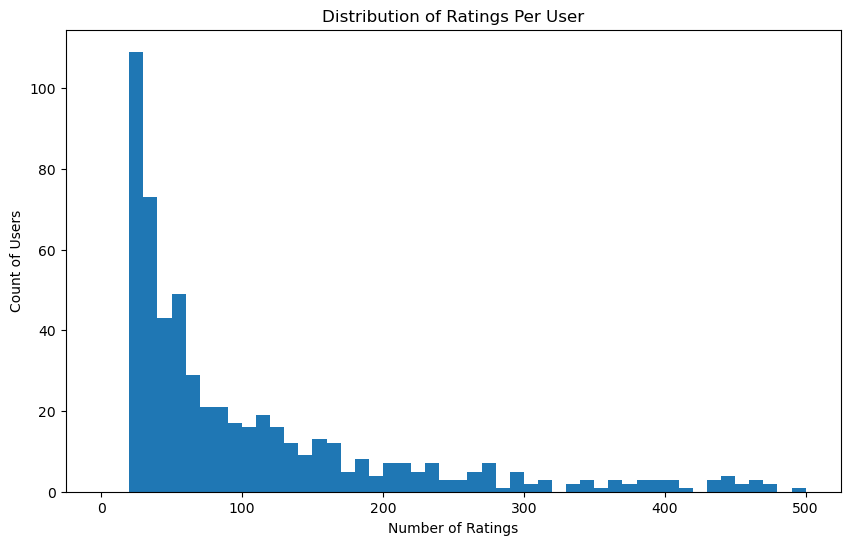

In [38]:
# Distribution of ratings per user
ratings_per_user = ratings_df['userId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, range=(0, 500))
plt.title('Distribution of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

Most users have provided 150 or less ratings on movies.

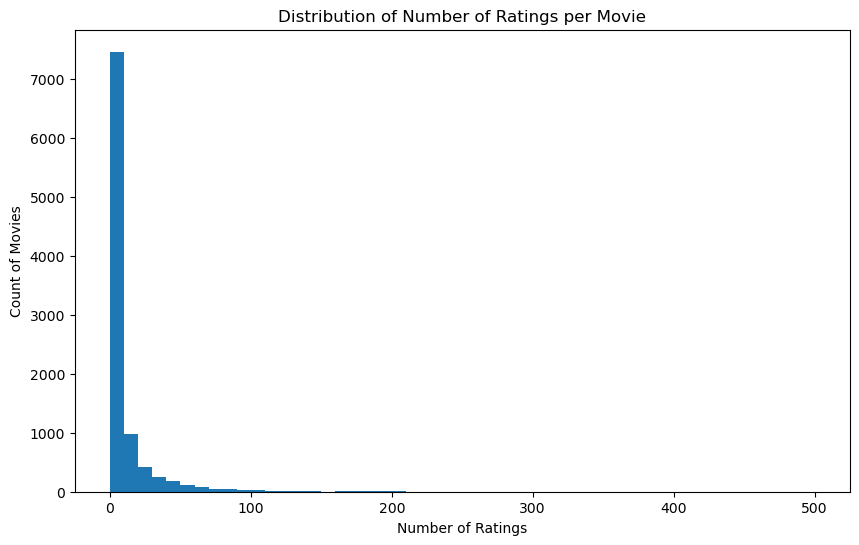

In [43]:
ratings_per_movie = ratings_df['movieId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(ratings_per_movie, bins=50, range=(0, 500))
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

---

#### movies.csv

The movies table will be important for mapping movieId's from recommendations to actual movie titles. Genre information can be used for content-based filtering algorithms.

In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [25]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Top 10 most frequently rated movies visualized:

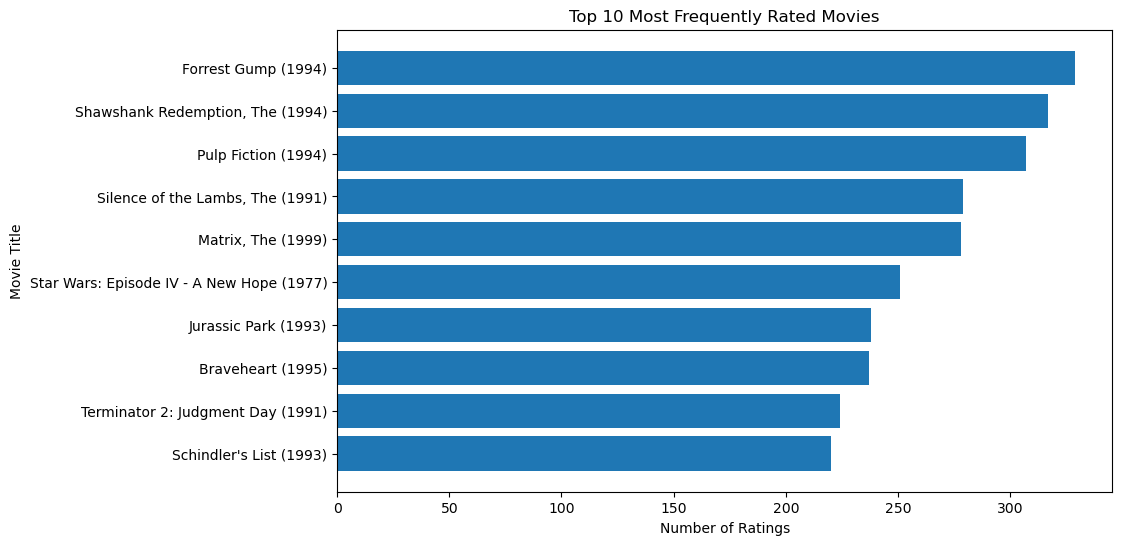

In [ ]:
# The 90s are still relevant baby!
ratings_per_movie = ratings_df['movieId'].value_counts()
top_rated_movies = ratings_per_movie.head(10).reset_index()
top_rated_movies.columns = ['movieId', 'Rating Count']
top_rated_movies = top_rated_movies.merge(movies_df[['movieId', 'title']], on='movieId', how='left')

plt.figure(figsize=(10, 6))
plt.barh(top_rated_movies['title'], top_rated_movies['Rating Count'])
plt.title('Top 10 Most Frequently Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  
plt.show()

Let's take a look at the most common genres.

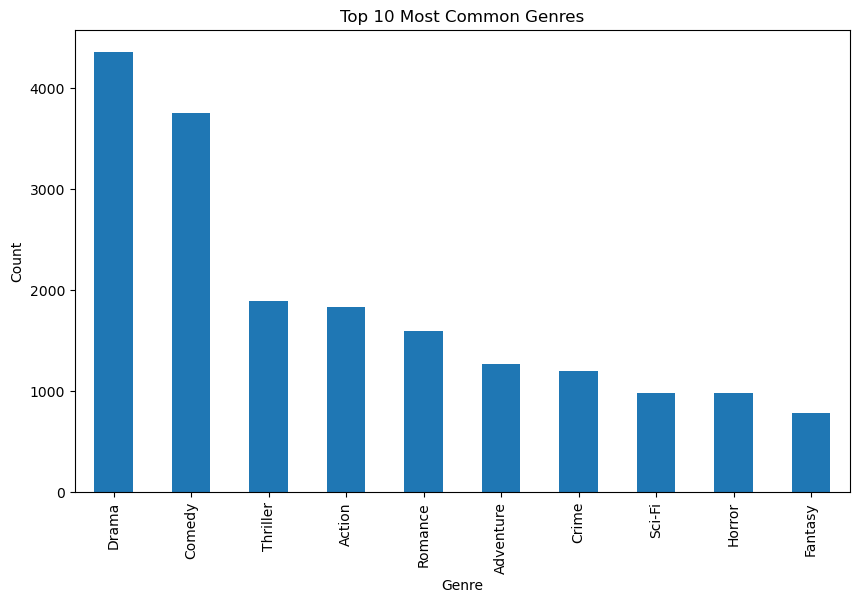

In [ ]:
# Unsurprisingly, drama and comedy are the most common genres
movies_df['genres_split'] = movies_df['genres'].str.split('|')  # Split genres into a list
genre_count = pd.Series([genre for genres in movies_df['genres_split'] for genre in genres]).value_counts()

plt.figure(figsize=(10, 6))
genre_count.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [37]:
# Checking for duplicate movies with different movieId
duplicate_titles = movies_df[movies_df.duplicated(subset='title', keep=False)]

duplicate_titles = duplicate_titles.sort_values(by='title')

print(duplicate_titles)

      movieId                                   title  \
4169     6003  Confessions of a Dangerous Mind (2002)   
9106   144606  Confessions of a Dangerous Mind (2002)   
650       838                             Emma (1996)   
5601    26958                             Emma (1996)   
5854    32600                             Eros (2004)   
9135   147002                             Eros (2004)   
2141     2851                         Saturn 3 (1980)   
9468   168358                         Saturn 3 (1980)   
5931    34048                War of the Worlds (2005)   
6932    64997                War of the Worlds (2005)   

                                   genres  
4169          Comedy|Crime|Drama|Thriller  
9106  Comedy|Crime|Drama|Romance|Thriller  
650                  Comedy|Drama|Romance  
5601                              Romance  
5854                                Drama  
9135                        Drama|Romance  
2141            Adventure|Sci-Fi|Thriller  
9468                

---

#### tags.csv

This tags table could also be used for content-based filtering with a little bit of NLP on the actual tags.

In [26]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [31]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [27]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [28]:
tags_df['tag'].value_counts()

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: count, Length: 1589, dtype: int64

In [49]:
tags_df['tag'].value_counts().head(15)

tag
In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
funny                  23
surreal                23
Disney                 23
religion               22
sci-fi                 21
quirky                 21
dark comedy            21
psychology             21
suspense               20
twist ending           19
visually appealing     19
Name: count, dtype: int64

---

#### links.csv

This table is useful if I want to utilize data from IMDb or TMDb in addition to the MovieLens data I have here.

In [29]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [30]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


---

This dataset from MovieLends is fairly basic and contains no additional features of users or movies. The models built with this dataset is thus likely to be less robust.